# Coursework 2: Image Classification

In this coursework, you are going to develop a neural network model for for image classification.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [2]:
# Import libraries (provided)
import numpy as np 
import matplotlib.pyplot as plt
import time
import random
from sklearn import metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

## 1. Load and visualise data. (25 marks)

Throughout this coursework. you will be working with the Fashion-MNIST dataset. If you are interested, you may find information about the dataset in this paper.

[1] Han Xiao, Kashif Rasul, Roland Vollgraf. Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The dataset is prepared in a similar way to MNIST. It is split into a training set of 60,000 images and a test set of 10,000 images. The images are of size 28x28 pixels.

There are in total 10 label classes, which are:

| Label       | Description |
| ----------- | ----------- |
| 0  |  T-shirt/top |
| 1  |  Trousers    |
| 2  |  Pullover    |
| 3  |  Dress       |
| 4  |  Coat        |
| 5  |  Sandal      |
| 6  |  Shirt       |
| 7  |  Sneaker     |
| 8  |  Bag         |
| 9  |  Ankle boot  |

In [4]:
# Load data (provided)
# Note that some early versions of torchvision use different names, such as train_data, test_data instead of data.
# However, after torchvision version 0.4.0, data is used as the variable name.
train_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=True)
train_image = np.array(train_set.data)
train_label = np.array(train_set.targets)
class_name = train_set.classes

test_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=False)
test_image = np.array(test_set.data)
test_label = np.array(test_set.targets)

0.2%Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to .\FashionMNIST\raw\train-images-idx3-ubyte.gz
100.0%Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz
111.0%Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to .\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz
159.1%Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


### 1.1 Display the dimension of the training and test sets. (5 marks)

In [13]:
print('training set: ', train_image.shape)
print('test set: ', test_image.shape)

training set:  (60000, 28, 28)
test set:  (10000, 28, 28)
<class 'torchvision.datasets.mnist.FashionMNIST'>


### 1.2 Visualise sample images for each of the 10 classes. (5 marks)

Please plot 10 rows x 10 columns of images. Each row shows 10 samples for one class. For example, row 1 shows 10 `T-shirt/top` images, row 2 shows 10 `Trousers` images.

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

def photoGrid(imgs, r, c):
    assert len(imgs) == r*c
    fig = plt.figure(figsize=(10.,10.))
    grid = ImageGrid(fig, 111, nrows_ncols=(r,c), axes_pad=0.1)
    for ax, img in zip(grid, imgs):
        ax.imshow(img)
        ax.set_axis_off()
    plt.show()

def collectImages(imgs, cat, num):
    imgs = np.zeros((0, imgs[0].shape[0], imgs[0].shape[1]))
    for img, label in zip(train_image, train_label):
        if imgs.shape[0] >= num:
            break
        if label == cat:
            imgs = np.append(imgs, [img], axis=0)
    return imgs

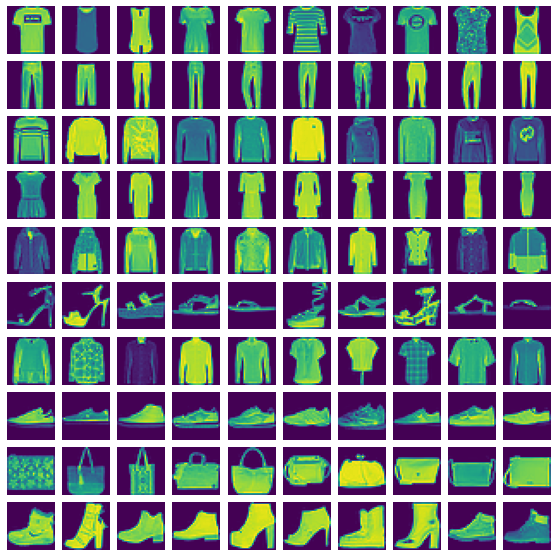

In [54]:
photos = np.zeros((100, 28, 28))

######## GET PHOTOS ##############
for cat in range(0, 10):
    i = cat*10
    photos[i:i+10,:,:] = collectImages(train_image, cat, 10)
##################################

photoGrid(photos, 10, 10)

### 1.3 Display the number of training samples for each class. (5 marks)

In [55]:
for cat in range(0, 10):
    total = 0
    for label in train_label:
        if cat == label:
            total += 1
    print('cat ', cat, ': ', total)

cat  0 :  6000
cat  1 :  6000
cat  2 :  6000
cat  3 :  6000
cat  4 :  6000
cat  5 :  6000
cat  6 :  6000
cat  7 :  6000
cat  8 :  6000
cat  9 :  6000


### 1.4 Discussion. (10 marks)

Is the dataset balanced? Would you prefer a balanced or unbalanced dataset? Explain why?

The dataset is perfectly balanced. Each category has exactly the same number of items: 6000. This is better for learning than an unbalanced set, as that would result in a bias towards whichever category has the most samples, as statistically any single sample is more likely to belong to that category.

## 2. Image classification. (55 marks)

### 2.1 Build a convolutional neural network using the `PyTorch` library to perform classification on the Fashion-MNIST dataset. (15 marks)

You can design a network architecture similar to LeNet (shown below), which consists a number of convolutional layers and a few fully connected layers at the end.

![](lenet.png)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ...

    def forward(self, x):
        # Forward propagation
        ...
    
# Since most of you use laptops, you may use CPU for training.
# If you have a good GPU, you can set this to 'gpu'.
device = 'cpu'

# Network
model = Net().to(device)

### 2.2 Define the loss function, optimiser and hyper-parameters such as the learning rate, number of iterations, batch size etc. (5 marks)

### 2.3 Start model training. (15 marks)

At each iteration, get a random batch of images and labels from train_image and train_label, convert them into torch tensors, feed into the network model and perform gradient descent.

Print out training loss and training time.

### 2.4 Deploy the trained model onto the test set. (10 marks)

Please also evaluate how long it takes for testing.

### 2.5 Evaluate the classification accuracy on the test set. (5 marks)

### 2.6 Print out and visualise the confusion matrix. (5 marks)
You can use relevant functions in [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## 3. Deploy in real world. (20 marks)

Take 3 photos that belongs to the 10 classes (e.g. clothes, shoes) in your real life. Use Python or any other software (Photoshop, Gimp etc) to convert the photos into grayscale, negate the intensities so that background becomes black or dark, crop the region of interest and reshape into the size of 28x28. You do not need to show the pre-processing step in this coursework.

### 3.1 Load and visualise your own images. (5 marks)

### 3.2 Test your network on the real images and display the classification results. (5 marks)

### 3.3 Comment on the classification results. (10 marks)

Does the model work? Is there anyway to improve the real life performance of the model?

## 4. Survey: How long does it take you to complete the coursework?